## Declare the necessary libraries

In [1]:
import pandas as pd
from pandas import datetime
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_predict

C:\Users\HP\AppData\Local\Temp\ipykernel_2364\2858304008.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

## input data

In [3]:
File_Input_Path = "shampoo.csv"

series = pd.read_csv(File_Input_Path, parse_dates=[0], date_parser=parser)

In [4]:
series.head(4)

,Month,Sales
0,1901-01-01,266.0
1,1901-02-01,145.9
2,1901-03-01,183.1
3,1901-04-01,119.3


In [5]:
series= series.set_index('Month')
series.head()

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


# Data Preparation Make the data non-seasonal

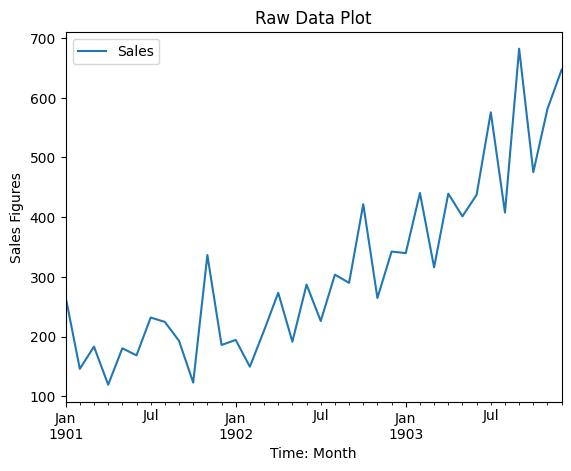

Seems that data is non-seasonal


In [6]:
series.plot()
plt.xlabel("Time: Month")
plt.ylabel("Sales Figures")
plt.title("Raw Data Plot")
plt.show()

print("Seems that data is non-seasonal")

## Model Identification
# ACF plot

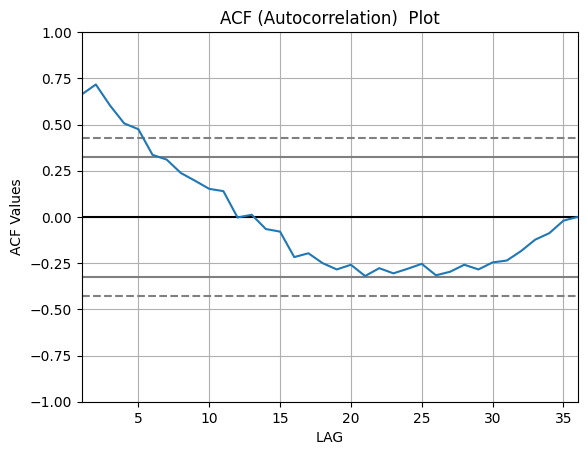

Seems that correlation value start to sharp decay at lag 5


In [7]:
autocorrelation_plot(series)
plt.xlabel("LAG")
plt.ylabel("ACF Values")
plt.title("ACF (Autocorrelation)  Plot")
plt.show()

print("Seems that correlation value start to sharp decay at lag 5")

In [8]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

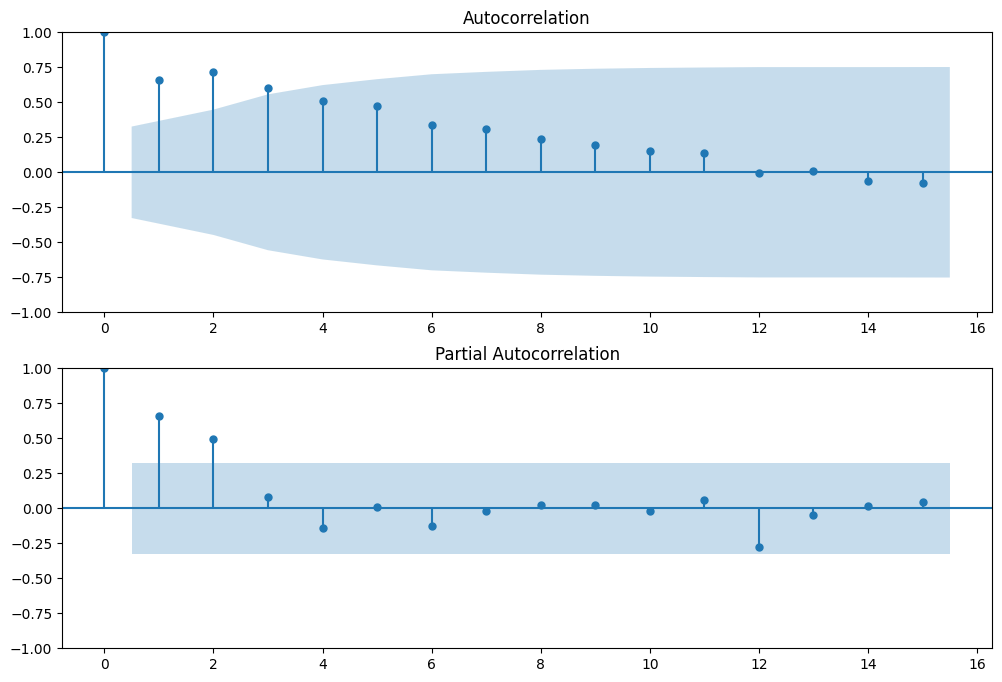

In [9]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(series,lags=15,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(series,lags=15,ax=ax2)

In [10]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

In [11]:
autoarima_model = auto_arima(series, trace=True)
print(autoarima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=430.873, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=405.977, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=408.967, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=429.229, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=403.573, Time=0.78 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=404.633, Time=0.71 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=404.226, Time=0.65 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=402.407, Time=0.59 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=401.463, Time=1.33 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.12 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.21 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.49 sec

Best 

# Create an ARIMA model AR(1,1,2)

In [14]:
size = int(len(series) * 0.85)
train= series[:size]
test= series[size:]

In [15]:
test

,Sales
Month,
1903-07-01,575.5
1903-08-01,407.6
1903-09-01,682.0
1903-10-01,475.3
1903-11-01,581.3
1903-12-01,646.9


In [16]:
model=SARIMAX(train,order=(1,1,2),seasonal_order=(1,1,2,12))
# model=ARIMA(train,order=(1,1,2))
results=model.fit()

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few o

# Fit the model

# test data prediction using forecast 


In [17]:
forecast=results.forecast(steps=len(test))
#  we can use this also for prediction
# forecast=results.predict(start=len(train)+1 ,end=len(df), dynamic=True)

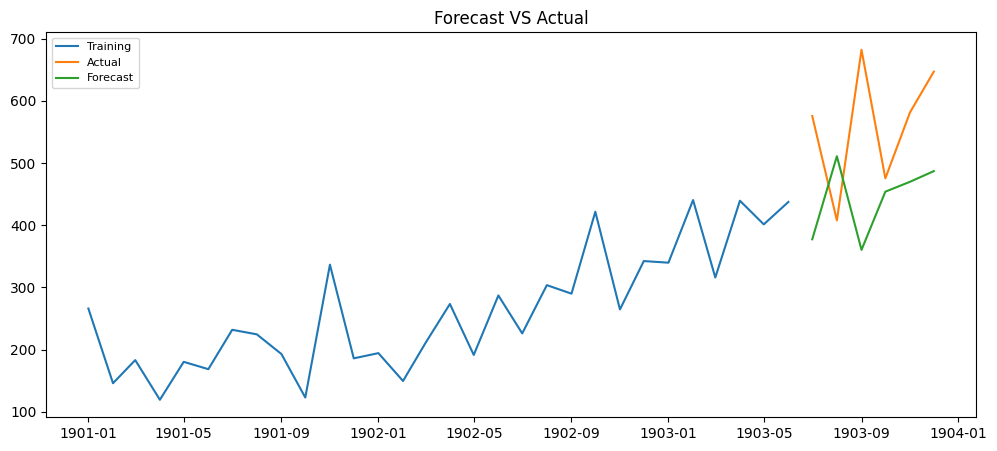

In [18]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(forecast, label='Forecast')
# # plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast VS Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# error find

In [19]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [21]:
rmse= sqrt(mean_squared_error(forecast,test))
rmse

178.84844457325508

## future forecast

In [22]:
forecast_steps = len(test) 
# forecast_results = fitted.get_forecast(steps=forecast_steps)
forecast = results.forecast(steps=forecast_steps+20) 

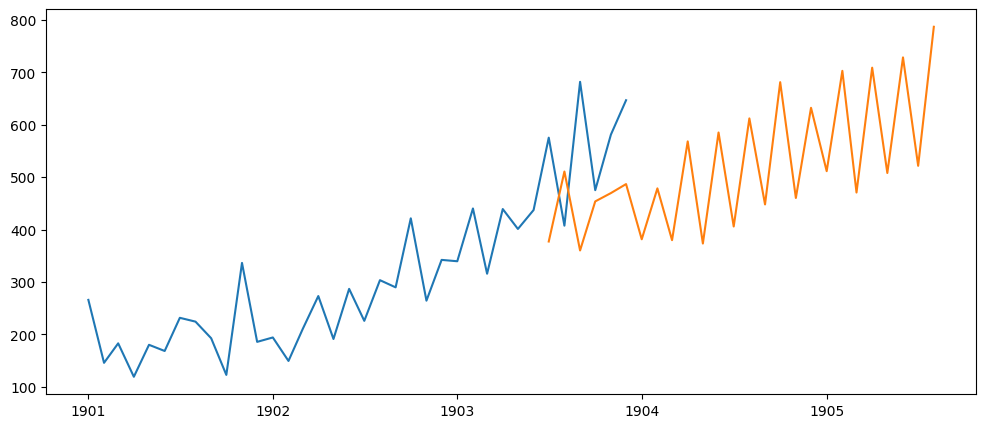

In [24]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(series, label='Training')
plt.plot(forecast, label='Forecast')

In [29]:
forecast

1903-07-01    377.338467
1903-08-01    510.868455
1903-09-01    360.285497
1903-10-01    453.889531
1903-11-01    469.761543
1903-12-01    486.935090
1904-01-01    381.626322
1904-02-01    478.730211
1904-03-01    379.917897
1904-04-01    568.347792
1904-05-01    373.514702
1904-06-01    585.317341
1904-07-01    406.042871
1904-08-01    612.191490
1904-09-01    448.127477
1904-10-01    681.331524
1904-11-01    460.451009
1904-12-01    632.457628
1905-01-01    511.528186
1905-02-01    702.957888
1905-03-01    470.817057
1905-04-01    708.977861
1905-05-01    508.085795
1905-06-01    728.592860
1905-07-01    521.782253
1905-08-01    787.022917
Freq: MS, Name: predicted_mean, dtype: float64

## make future prediction


In [25]:
# future_datest_df=pd.DataFrame(index=future_dates[0:])


future_datest_df=pd.date_range(start='1903-12-01',end='1905-12-01' , freq='MS')

future_datest_df=pd.DataFrame(index=future_datest_df)
# future_datest_df.head(20)

In [26]:
future_datest_df= results.predict(start = 35, end = 60, dynamic= True)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


In [28]:
future_datest_df

1903-12-01    486.935090
1904-01-01    381.626322
1904-02-01    478.730211
1904-03-01    379.917897
1904-04-01    568.347792
1904-05-01    373.514702
1904-06-01    585.317341
1904-07-01    406.042871
1904-08-01    612.191490
1904-09-01    448.127477
1904-10-01    681.331524
1904-11-01    460.451009
1904-12-01    632.457628
1905-01-01    511.528186
1905-02-01    702.957888
1905-03-01    470.817057
1905-04-01    708.977861
1905-05-01    508.085795
1905-06-01    728.592860
1905-07-01    521.782253
1905-08-01    787.022917
1905-09-01    507.910498
1905-10-01    736.761886
1905-11-01    612.216457
1905-12-01    765.408900
1906-01-01    531.541203
Freq: MS, Name: predicted_mean, dtype: float64

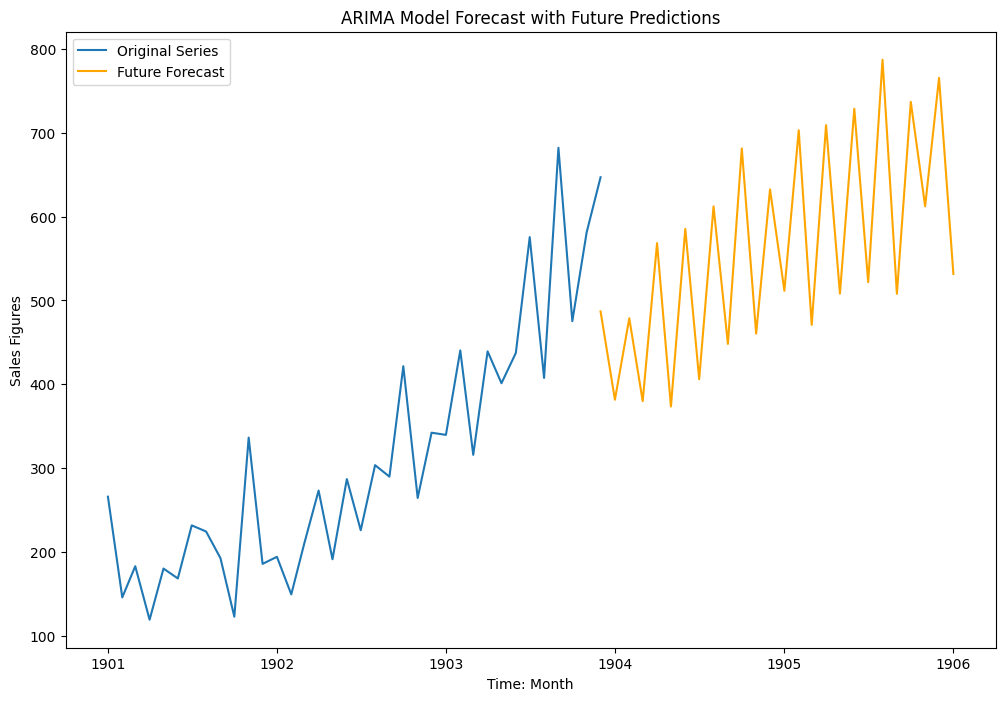

In [27]:
plt.figure(figsize=(12, 8))
plt.plot(series, label='Original Series')
plt.plot(future_datest_df, color='orange', label='Future Forecast')
plt.title('ARIMA Model Forecast with Future Predictions')
plt.xlabel('Time: Month')
plt.ylabel('Sales Figures')
plt.legend()
plt.show()